In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df1 = df.copy()

In [6]:
from sklearn.model_selection import train_test_split

**Input features** -- R&D Spend, Administration, Marketing Spend


**Predicted feature** -- Profit

In [7]:
y = df1["Profit"]


In [8]:
df1.drop(columns = ["State","Profit"],inplace = True)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(df1,y,test_size= 0.25,random_state= 42)

In [10]:
X_train

,R&D Spend,Administration,Marketing Spend
8,120542.52,148718.95,311613.29
3,144372.41,118671.85,383199.62
6,134615.46,147198.87,127716.82
41,27892.92,84710.77,164470.71
46,1315.46,115816.21,297114.46
47,0.00,135426.92,0.00
15,114523.61,122616.84,261776.23
9,123334.88,108679.17,304981.62
16,78013.11,121597.55,264346.06
24,77044.01,99281.34,140574.81


In [11]:
X_test

,R&D Spend,Administration,Marketing Spend
13,91992.39,135495.07,252664.93
39,38558.51,82982.09,174999.30
30,61994.48,115641.28,91131.24
45,1000.23,124153.04,1903.93
17,94657.16,145077.58,282574.31
48,542.05,51743.15,0.00
26,75328.87,144135.98,134050.07
25,64664.71,139553.16,137962.62
32,63408.86,129219.61,46085.25
19,86419.70,153514.11,0.00


In [12]:
y_train

8     152211.77
3     182901.99
6     156122.51
41     77798.83
46     49490.75
47     42559.73
15    129917.04
9     149759.96
16    126992.93
24    108552.04
34     96712.80
31     97483.56
0     192261.83
44     65200.33
27    105008.31
33     96778.92
5     156991.12
29    101004.64
11    144259.40
36     90708.19
1     191792.06
21    111313.02
2     191050.39
43     69758.98
35     96479.51
23    108733.99
40     78239.91
10    146121.95
22    110352.25
18    124266.90
49     14681.40
20    118474.03
7     155752.60
42     71498.49
14    132602.65
28    103282.38
38     81229.06
Name: Profit, dtype: float64

In [13]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
12    141585.52
4     166187.94
37     89949.14
Name: Profit, dtype: float64

In [14]:
from sklearn.linear_model import LinearRegression
res = LinearRegression()
res.fit(X_train,y_train)

LinearRegression()

In [15]:
res.coef_


array([ 0.80929474, -0.08912612,  0.03046688])

In [16]:
res.intercept_

56361.49300232511

In [17]:
y_pred = res.predict(X_test)

In [18]:
from sklearn.metrics import r2_score

**R2** depicts How Accurate our prediction is ...

In [19]:
a = r2_score(y_test,y_pred)
a

0.9193827032400599

In [20]:
res.predict([[16534,221368,233233]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57118.5838696])

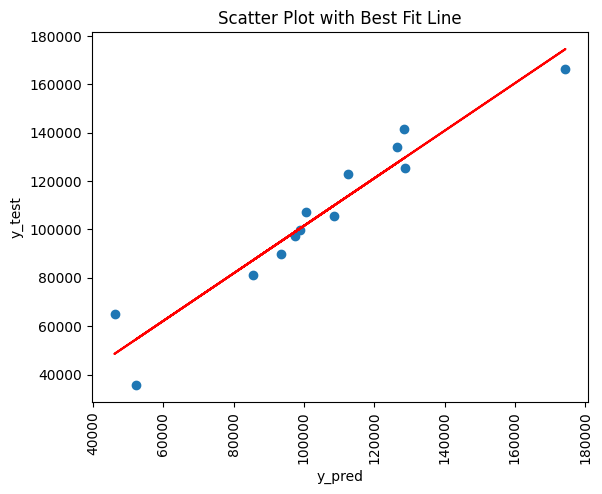

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_pred, y_test)

# Calculate the best-fit line using numpy
m, b = np.polyfit(y_pred, y_test, 1)

# Plot the best-fit line
plt.plot(y_pred, m*y_pred + b, color='red')

plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Scatter Plot with Best Fit Line')
plt.xticks(rotation=90)
plt.show();